In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Listar todos os tickers do dataset S&P 500
tickers = pd.read_csv('all_stocks_5yr.csv')['Name'].unique()

# Datas de início e fim
start_date = "2018-01-01"
end_date = "2023-01-01"
dividend_data = pd.DataFrame()

# Tickers problemáticos
failed_tickers = []

for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        dividends = stock.dividends.loc[start_date:end_date]
        
        if dividends.empty:
            raise ValueError(f"{ticker} não possui dados de dividendos.")
        
        dividends = dividends.reset_index()
        dividends['Ticker'] = ticker
        dividend_data = pd.concat([dividend_data, dividends], ignore_index=True)
    
    except Exception as e:
        print(f"Erro ao carregar dados para {ticker}: {e}")
        failed_tickers.append(ticker)

# Remover tickers problemáticos
print(f"Tickers removidos: {failed_tickers}")

# Renomear colunas
dividend_data.columns = ['Date', 'Dividends', 'Ticker']

# Calcular a Média dos Dividendos dos Últimos 5 Anos
average_dividends = dividend_data.groupby('Ticker')['Dividends'].mean().reset_index()
average_dividends.columns = ['Ticker', 'AverageDividend']

# Criar a Coluna-Alvo `target`
average_dividends['target'] = np.where(average_dividends['AverageDividend'] > 0.06, 1, 0)

# Preparar Dados para Treino e Teste
X = average_dividends[['AverageDividend']].values
y = average_dividends['target'].values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir dados em treino e teste inicialmente
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Dividir novamente para obter conjuntos de validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalizar dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)




$ABC: possibly delisted; no timezone found


Erro ao carregar dados para ABC: ABC não possui dados de dividendos.
Erro ao carregar dados para ADBE: ADBE não possui dados de dividendos.
Erro ao carregar dados para ADSK: ADSK não possui dados de dividendos.


$ADS: possibly delisted; no timezone found


Erro ao carregar dados para ADS: ADS não possui dados de dividendos.


$AGN: possibly delisted; no timezone found


Erro ao carregar dados para AGN: AGN não possui dados de dividendos.
Erro ao carregar dados para AKAM: AKAM não possui dados de dividendos.
Erro ao carregar dados para ALGN: ALGN não possui dados de dividendos.


$ALXN: possibly delisted; no timezone found


Erro ao carregar dados para ALXN: ALXN não possui dados de dividendos.
Erro ao carregar dados para AMD: AMD não possui dados de dividendos.
Erro ao carregar dados para AMZN: AMZN não possui dados de dividendos.
Erro ao carregar dados para ANSS: ANSS não possui dados de dividendos.


$ANTM: possibly delisted; no timezone found


Erro ao carregar dados para ANTM: ANTM não possui dados de dividendos.


$APC: possibly delisted; no timezone found


Erro ao carregar dados para APC: APC não possui dados de dividendos.


$ARNC: possibly delisted; no timezone found


Erro ao carregar dados para ARNC: ARNC não possui dados de dividendos.


$ATVI: possibly delisted; no timezone found


Erro ao carregar dados para ATVI: ATVI não possui dados de dividendos.
Erro ao carregar dados para AZO: AZO não possui dados de dividendos.


$BBT: possibly delisted; no timezone found


Erro ao carregar dados para BBT: BBT não possui dados de dividendos.


$BF.B: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para BF.B: BF.B não possui dados de dividendos.
Erro ao carregar dados para BHF: BHF não possui dados de dividendos.


$BHGE: possibly delisted; no timezone found


Erro ao carregar dados para BHGE: BHGE não possui dados de dividendos.
Erro ao carregar dados para BIIB: BIIB não possui dados de dividendos.


$BLL: possibly delisted; no timezone found


Erro ao carregar dados para BLL: BLL não possui dados de dividendos.


$BRK.B: possibly delisted; no timezone found


Erro ao carregar dados para BRK.B: BRK.B não possui dados de dividendos.
Erro ao carregar dados para BSX: BSX não possui dados de dividendos.


$CBG: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para CA: CA não possui dados de dividendos.
Erro ao carregar dados para CBG: CBG não possui dados de dividendos.


$CBS: possibly delisted; no timezone found


Erro ao carregar dados para CBS: CBS não possui dados de dividendos.
Erro ao carregar dados para CDNS: CDNS não possui dados de dividendos.


$CELG: possibly delisted; no timezone found


Erro ao carregar dados para CELG: CELG não possui dados de dividendos.


$CERN: possibly delisted; no timezone found


Erro ao carregar dados para CERN: CERN não possui dados de dividendos.
Erro ao carregar dados para CHTR: CHTR não possui dados de dividendos.
Erro ao carregar dados para CMG: CMG não possui dados de dividendos.
Erro ao carregar dados para CNC: CNC não possui dados de dividendos.


$COG: possibly delisted; no timezone found


Erro ao carregar dados para COG: COG não possui dados de dividendos.
Erro ao carregar dados para COL: COL não possui dados de dividendos.
Erro ao carregar dados para CRM: CRM não possui dados de dividendos.


$CTL: possibly delisted; no timezone found


Erro ao carregar dados para CTL: CTL não possui dados de dividendos.


$CTXS: possibly delisted; no timezone found


Erro ao carregar dados para CTXS: CTXS não possui dados de dividendos.


$CXO: possibly delisted; no timezone found


Erro ao carregar dados para CXO: CXO não possui dados de dividendos.


$DISCA: possibly delisted; no timezone found


Erro ao carregar dados para DISCA: DISCA não possui dados de dividendos.


$DISCK: possibly delisted; no timezone found


Erro ao carregar dados para DISCK: DISCK não possui dados de dividendos.


$DISH: possibly delisted; no timezone found


Erro ao carregar dados para DISH: DISH não possui dados de dividendos.
Erro ao carregar dados para DLTR: DLTR não possui dados de dividendos.


$DPS: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para DPS: DPS não possui dados de dividendos.


$DRE: possibly delisted; no timezone found


Erro ao carregar dados para DRE: DRE não possui dados de dividendos.
Erro ao carregar dados para DVA: DVA não possui dados de dividendos.


$DWDP: possibly delisted; no timezone found


Erro ao carregar dados para DWDP: DWDP não possui dados de dividendos.
Erro ao carregar dados para ESRX: ESRX não possui dados de dividendos.


$ETFC: possibly delisted; no timezone found


Erro ao carregar dados para ETFC: ETFC não possui dados de dividendos.
Erro ao carregar dados para EVHC: EVHC não possui dados de dividendos.
Erro ao carregar dados para EW: EW não possui dados de dividendos.


$FBHS: possibly delisted; no timezone found


Erro ao carregar dados para FBHS: FBHS não possui dados de dividendos.


$FB: possibly delisted; no timezone found


Erro ao carregar dados para FB: FB não possui dados de dividendos.
Erro ao carregar dados para FFIV: FFIV não possui dados de dividendos.
Erro ao carregar dados para FISV: FISV não possui dados de dividendos.


$FLIR: possibly delisted; no timezone found


Erro ao carregar dados para FLIR: FLIR não possui dados de dividendos.


$GGP: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para GGP: GGP não possui dados de dividendos.
Erro ao carregar dados para GOOGL: GOOGL não possui dados de dividendos.
Erro ao carregar dados para GOOG: GOOG não possui dados de dividendos.


$GPS: possibly delisted; no timezone found


Erro ao carregar dados para GPS: GPS não possui dados de dividendos.


$HCN: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para HCN: HCN não possui dados de dividendos.
Erro ao carregar dados para HCP: HCP não possui dados de dividendos.
Erro ao carregar dados para HOLX: HOLX não possui dados de dividendos.


$HRS: possibly delisted; no timezone found


Erro ao carregar dados para HRS: HRS não possui dados de dividendos.
Erro ao carregar dados para HSIC: HSIC não possui dados de dividendos.
Erro ao carregar dados para IDXX: IDXX não possui dados de dividendos.
Erro ao carregar dados para ILMN: ILMN não possui dados de dividendos.
Erro ao carregar dados para INCY: INCY não possui dados de dividendos.
Erro ao carregar dados para INFO: INFO não possui dados de dividendos.
Erro ao carregar dados para IQV: IQV não possui dados de dividendos.
Erro ao carregar dados para ISRG: ISRG não possui dados de dividendos.
Erro ao carregar dados para IT: IT não possui dados de dividendos.


$JEC: possibly delisted; no timezone found


Erro ao carregar dados para JEC: JEC não possui dados de dividendos.


$KORS: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para KMX: KMX não possui dados de dividendos.
Erro ao carregar dados para KORS: KORS não possui dados de dividendos.


$KSU: possibly delisted; no timezone found


Erro ao carregar dados para KSU: KSU não possui dados de dividendos.
Erro ao carregar dados para LB: LB não possui dados de dividendos.


$LLL: possibly delisted; no timezone found


Erro ao carregar dados para LLL: LLL não possui dados de dividendos.


$LUK: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para LUK: LUK não possui dados de dividendos.
Erro ao carregar dados para MAT: MAT não possui dados de dividendos.
Erro ao carregar dados para MHK: MHK não possui dados de dividendos.
Erro ao carregar dados para MNST: MNST não possui dados de dividendos.


$MON: possibly delisted; no timezone found


Erro ao carregar dados para MON: MON não possui dados de dividendos.
Erro ao carregar dados para MTD: MTD não possui dados de dividendos.


$MYL: possibly delisted; no timezone found


Erro ao carregar dados para MYL: MYL não possui dados de dividendos.


$NBL: possibly delisted; no timezone found


Erro ao carregar dados para NBL: NBL não possui dados de dividendos.
Erro ao carregar dados para NCLH: NCLH não possui dados de dividendos.
Erro ao carregar dados para NFLX: NFLX não possui dados de dividendos.
Erro ao carregar dados para NFX: NFX não possui dados de dividendos.


$NLSN: possibly delisted; no timezone found


Erro ao carregar dados para NLSN: NLSN não possui dados de dividendos.
Erro ao carregar dados para ORLY: ORLY não possui dados de dividendos.


$PBCT: possibly delisted; no timezone found


Erro ao carregar dados para PBCT: PBCT não possui dados de dividendos.
Erro ao carregar dados para PCG: PCG não possui dados de dividendos.


$PCLN: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para PCLN: PCLN não possui dados de dividendos.


$PKI: possibly delisted; no timezone found


Erro ao carregar dados para PKI: PKI não possui dados de dividendos.


$PXD: possibly delisted; no timezone found


Erro ao carregar dados para PXD: PXD não possui dados de dividendos.
Erro ao carregar dados para PYPL: PYPL não possui dados de dividendos.
Erro ao carregar dados para QRVO: QRVO não possui dados de dividendos.
Erro ao carregar dados para REGN: REGN não possui dados de dividendos.


$RE: possibly delisted; no timezone found


Erro ao carregar dados para RE: RE não possui dados de dividendos.


$RHT: possibly delisted; no timezone found


Erro ao carregar dados para RHT: RHT não possui dados de dividendos.


$RTN: possibly delisted; no timezone found


Erro ao carregar dados para RTN: RTN não possui dados de dividendos.
Erro ao carregar dados para SNPS: SNPS não possui dados de dividendos.
Erro ao carregar dados para SRCL: SRCL não possui dados de dividendos.
Erro ao carregar dados para STI: STI não possui dados de dividendos.


$SYMC: possibly delisted; no timezone found


Erro ao carregar dados para SYMC: SYMC não possui dados de dividendos.


$TIF: possibly delisted; no timezone found


Erro ao carregar dados para TIF: TIF não possui dados de dividendos.


$TMK: possibly delisted; no timezone found


Erro ao carregar dados para TMK: TMK não possui dados de dividendos.


$TSS: possibly delisted; no timezone found


Erro ao carregar dados para TSS: TSS não possui dados de dividendos.
Erro ao carregar dados para UAA: UAA não possui dados de dividendos.
Erro ao carregar dados para UAL: UAL não possui dados de dividendos.
Erro ao carregar dados para UA: UA não possui dados de dividendos.
Erro ao carregar dados para ULTA: ULTA não possui dados de dividendos.
Erro ao carregar dados para URI: URI não possui dados de dividendos.


$UTX: possibly delisted; no timezone found


Erro ao carregar dados para UTX: UTX não possui dados de dividendos.


$VAR: possibly delisted; no timezone found


Erro ao carregar dados para VAR: VAR não possui dados de dividendos.


$VIAB: possibly delisted; no timezone found


Erro ao carregar dados para VIAB: VIAB não possui dados de dividendos.
Erro ao carregar dados para VRSN: VRSN não possui dados de dividendos.
Erro ao carregar dados para VRTX: VRTX não possui dados de dividendos.
Erro ao carregar dados para WAT: WAT não possui dados de dividendos.


$WLTW: possibly delisted; no timezone found


Erro ao carregar dados para WLTW: WLTW não possui dados de dividendos.


$WRK: possibly delisted; no timezone found


Erro ao carregar dados para WRK: WRK não possui dados de dividendos.


$WYN: possibly delisted; no price data found  (1d 1925-11-29 -> 2024-11-04)


Erro ao carregar dados para WYN: WYN não possui dados de dividendos.


$XEC: possibly delisted; no timezone found


Erro ao carregar dados para XEC: XEC não possui dados de dividendos.


$XLNX: possibly delisted; no timezone found


Erro ao carregar dados para XLNX: XLNX não possui dados de dividendos.


$XL: possibly delisted; no timezone found


Erro ao carregar dados para XL: XL não possui dados de dividendos.
Tickers removidos: ['ABC', 'ADBE', 'ADSK', 'ADS', 'AGN', 'AKAM', 'ALGN', 'ALXN', 'AMD', 'AMZN', 'ANSS', 'ANTM', 'APC', 'ARNC', 'ATVI', 'AZO', 'BBT', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BLL', 'BRK.B', 'BSX', 'CA', 'CBG', 'CBS', 'CDNS', 'CELG', 'CERN', 'CHTR', 'CMG', 'CNC', 'COG', 'COL', 'CRM', 'CTL', 'CTXS', 'CXO', 'DISCA', 'DISCK', 'DISH', 'DLTR', 'DPS', 'DRE', 'DVA', 'DWDP', 'ESRX', 'ETFC', 'EVHC', 'EW', 'FBHS', 'FB', 'FFIV', 'FISV', 'FLIR', 'GGP', 'GOOGL', 'GOOG', 'GPS', 'HCN', 'HCP', 'HOLX', 'HRS', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INFO', 'IQV', 'ISRG', 'IT', 'JEC', 'KMX', 'KORS', 'KSU', 'LB', 'LLL', 'LUK', 'MAT', 'MHK', 'MNST', 'MON', 'MTD', 'MYL', 'NBL', 'NCLH', 'NFLX', 'NFX', 'NLSN', 'ORLY', 'PBCT', 'PCG', 'PCLN', 'PKI', 'PXD', 'PYPL', 'QRVO', 'REGN', 'RE', 'RHT', 'RTN', 'SNPS', 'SRCL', 'STI', 'SYMC', 'TIF', 'TMK', 'TSS', 'UAA', 'UAL', 'UA', 'ULTA', 'URI', 'UTX', 'VAR', 'VIAB', 'VRSN', 'VRTX', 'WAT', 'WLTW', 'WRK', 'WY

In [6]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Novo modelo
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),   # Definindo a forma de entrada usando a camada Input
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], 1)),  # Camada convolucional 1D
    LSTM(128, return_sequences=True),     # Camada LSTM
    #Dropout(0.2),                         # Regularização com Dropout
    Flatten(),                            # Aplanamento para entrada na camada densa
    Dense(64, activation='relu'),         # Camada densa com mais neurônios
    Dense(32, activation='relu'),         # Outra camada densa
    Dense(1, activation='sigmoid')        # Camada de saída para classificação binária
])

# Compilando o modelo com uma taxa de aprendizado reduzida para estabilidade
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping para interromper o treinamento se a perda de validação não melhorar
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinando o modelo
history = model.fit(X_train, y_train, 
                    epochs=70, 
                    batch_size=64,  
                    validation_split=0.2, 
                    verbose=1, 
                    callbacks=[early_stopping])


Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9798 - loss: 0.6887 - val_accuracy: 0.9811 - val_loss: 0.6766
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9731 - loss: 0.6752 - val_accuracy: 0.9811 - val_loss: 0.6599
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9715 - loss: 0.6604 - val_accuracy: 0.9811 - val_loss: 0.6407
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9632 - loss: 0.6433 - val_accuracy: 0.9811 - val_loss: 0.6185
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9710 - loss: 0.6216 - val_accuracy: 0.9811 - val_loss: 0.5926
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9606 - loss: 0.5995 - val_accuracy: 0.9811 - val_loss: 0.5624
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9663 - loss: 0.5680 - val_accuracy: 0.9811 - val_loss: 0.5271
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9699 - loss: 0.5332 - val_accuracy: 0.9811 - val_loss: 0.4863
Epoch 9

Graficos

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.1318
Acurácia do modelo: 92.98%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Classes previstas: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Classes reais: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


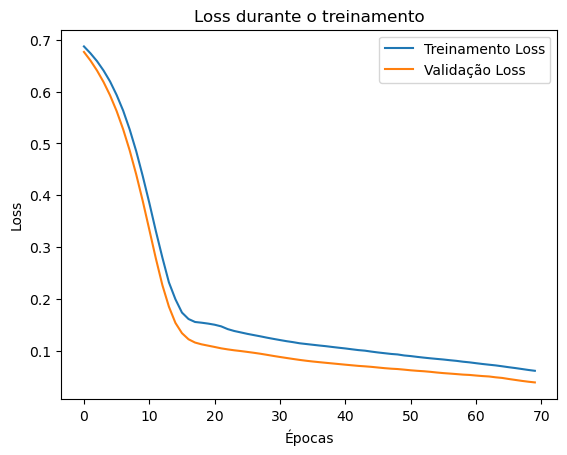

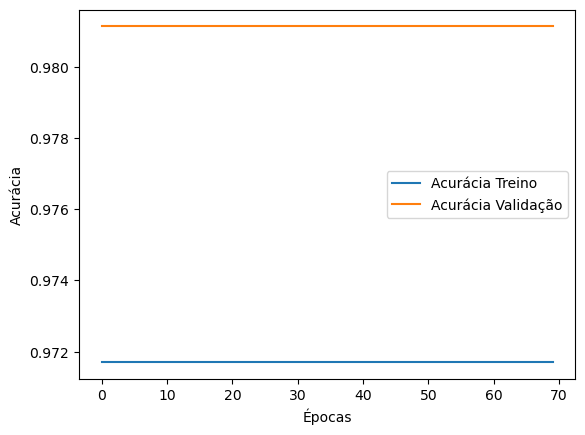

In [7]:
# Avaliar a Precisão do Modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

# Previsões
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
print("Classes previstas:", predicted_classes.flatten())
print("Classes reais:", y_test)

# Visualização do Treinamento
plt.plot(history.history['loss'], label='Treinamento Loss')
plt.plot(history.history['val_loss'], label='Validação Loss')
plt.title('Loss durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Gráfico de acurácia
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# # Gráfico de perda
# plt.plot(history.history['loss'], label='Perda Treino')
# plt.plot(history.history['val_loss'], label='Perda Validação')
# plt.xlabel('Épocas')
# plt.ylabel('Perda')
# plt.legend()
# plt.show()


Validação do modelo

In [8]:
# Avaliação no conjunto de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss no teste: {loss}')
print(f'Acurácia no teste: {accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.1318
Loss no teste: 0.11917906999588013
Acurácia no teste: 0.9298245906829834


In [9]:
# Exibir o número de amostras no treino e na validação
print("Número de amostras no treino:", len(X_train))
print("Número de amostras na validação:", len(X_val))


Número de amostras no treino: 265
Número de amostras na validação: 57
